In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the file
dt = pd.read_csv('Iris.csv')

In [3]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the shape of the dataset
dt.shape

(150, 6)

In [5]:
# checking the datatypes
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking the null values.
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# corealtion of the dataset
dt.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


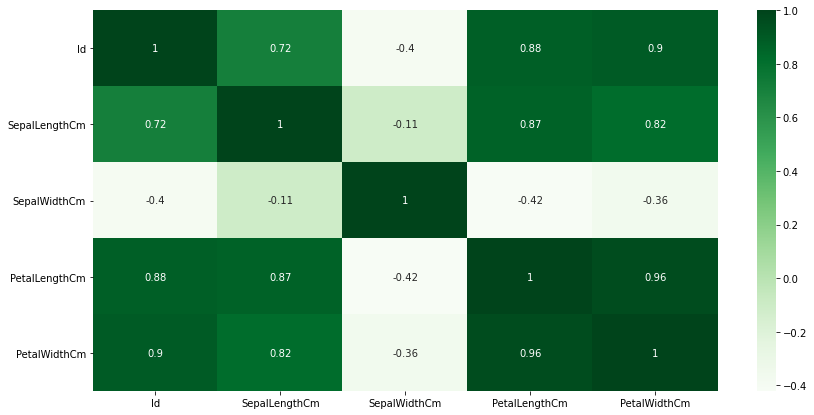

In [9]:
# ploting the heatmap on corelation 
plt.figure(figsize=(14,7))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [10]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
X=dt.iloc[:,1:5]
y=dt.iloc[:,5]

In [11]:
# encode the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# Check for data is balanced or imbalanced
unique_ele, unique_count = np.unique(y,return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_ele, unique_count)))

Frequency of unique values of the said array:
[[ 0  1  2]
 [50 50 50]]


In [13]:
# Data splitting train test and CV
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size= 0.2, random_state=42)

print("X_train shape: ",X_train.shape, "y_train shape: ",y_train.shape)
print("X_cv shape: ",X_cv.shape, "y_cv shape: ",y_cv.shape)
print("X_test shape: ",X_test.shape, "y_test shape: ",y_test.shape)

X_train shape:  (96, 4) y_train shape:  (96,)
X_cv shape:  (24, 4) y_cv shape:  (24,)
X_test shape:  (30, 4) y_test shape:  (30,)


In [14]:
# Fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
depthVal = [2,4,6,8,10,12,14,16,18,20]
for d in depthVal:
  clf = DecisionTreeClassifier(criterion = 'gini',max_depth=d)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_cv)
  print("Acuracy :",accuracy_score(y_pred,y_cv),"for",d)

Acuracy : 0.9166666666666666 for 2
Acuracy : 0.9166666666666666 for 4
Acuracy : 0.9166666666666666 for 6
Acuracy : 0.9166666666666666 for 8
Acuracy : 0.9166666666666666 for 10
Acuracy : 0.9166666666666666 for 12
Acuracy : 0.9166666666666666 for 14
Acuracy : 0.9166666666666666 for 16
Acuracy : 0.9166666666666666 for 18
Acuracy : 0.9166666666666666 for 20


In [15]:
# training the model
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=8)
clf.fit(X_train,y_train)
# predicting the model
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9666666666666667


In [16]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


[Text(313.875, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 96\nvalue = [32, 30, 34]'),
 Text(209.25, 427.11428571428576, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(418.5, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(209.25, 349.4571428571429, 'X[3] <= 1.6\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(104.625, 271.8, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(313.875, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(627.75, 349.4571428571429, 'X[2] <= 5.05\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(523.125, 271.8, 'X[1] <= 2.9\ngini = 0.444\nsamples = 9\nvalue = [0, 3, 6]'),
 Text(418.5, 194.14285714285717, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(627.75, 194.14285714285717, 'X[1] <= 3.05\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(523.125, 116.48571428571432, 'X[0] <= 6.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(418.5, 38.828571428

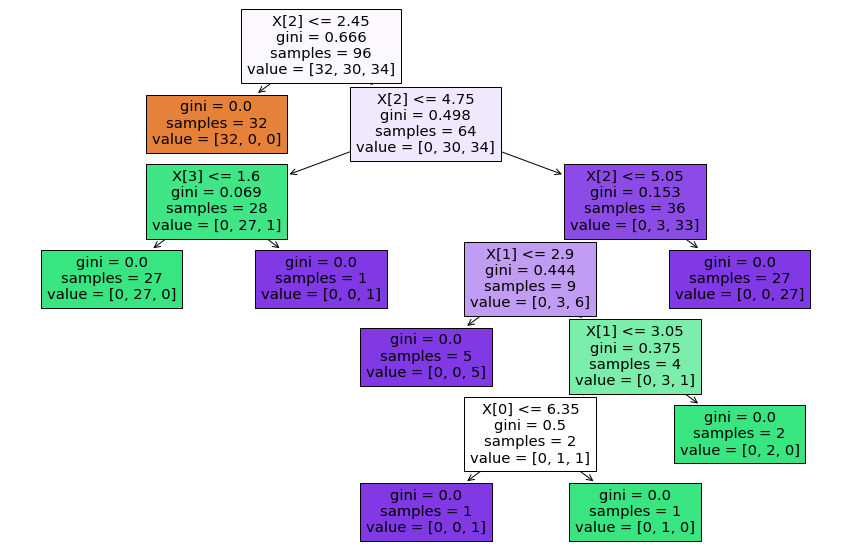

In [17]:
# ploting the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True) 